In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import os

In [3]:
df = pd.read_csv("Housing.csv")

In [4]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
nominal_cols = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']

df[nominal_cols] = df[nominal_cols].replace({"yes": 1, "no": 0})

C:\Users\audih\AppData\Local\Temp\ipykernel_13040\201093094.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[nominal_cols] = df[nominal_cols].replace({"yes": 1, "no": 0})


In [7]:
df['furnishingstatus'].unique()

array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

In [8]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# df['furnishingstatus'] = le.fit_transform(df['furnishingstatus'])

furnishingstatus_order = {'furnished' : 2, 'semi-furnished': 1, 'unfurnished': 0}
df['furnishingstatus'] = df['furnishingstatus'].map(furnishingstatus_order)

df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,545.0,4.766729e+06,1.870440e+06,1750000.0,3430000.0,4340000.0,5740000.0,13300000.0
area,545.0,5.150541e+03,2.170141e+03,1650.0,3600.0,4600.0,6360.0,16200.0
bedrooms,545.0,2.965138e+00,7.380639e-01,1.0,2.0,3.0,3.0,6.0
bathrooms,545.0,1.286239e+00,5.024696e-01,1.0,1.0,1.0,2.0,4.0
stories,545.0,1.805505e+00,8.674925e-01,1.0,1.0,2.0,2.0,4.0
mainroad,545.0,8.587156e-01,3.486347e-01,0.0,1.0,1.0,1.0,1.0
guestroom,545.0,1.779817e-01,3.828487e-01,0.0,0.0,0.0,0.0,1.0
basement,545.0,3.504587e-01,4.775519e-01,0.0,0.0,0.0,1.0,1.0
hotwaterheating,545.0,4.587156e-02,2.093987e-01,0.0,0.0,0.0,0.0,1.0
airconditioning,545.0,3.155963e-01,4.651799e-01,0.0,0.0,0.0,1.0,1.0


In [10]:
X = df.drop(columns=['price'])
y = df[["price"]].astype(float).values

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42) 

In [13]:
# scale_cols = ['price','area']
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train[ ['area'] ] = scaler_X.fit_transform(X_train[['area']])
X_val  [['area'] ] = scaler_X.transform(X_val[['area']])
X_test [['area'] ] = scaler_X.transform(X_test[['area']])

In [14]:
y_train = scaler_y.fit_transform(y_train)
y_val   = scaler_y.transform(y_val)
y_test  = scaler_y.transform(y_test)

In [15]:
X_train_array = np.array(X_train).T
Y_train_array = np.array(y_train).T


In [16]:
X_val_array = np.array(X_val).T
Y_val_array = np.array(y_val).T

In [17]:
#NEURAL NETWORKS

def init_params(input_dim, hidden_neuron=32, method = "xavier", rng=None):
    if rng is None:
        rng = np.random.default_rng(42)

    if method == "he":
        W1 = rng.standard_normal((hidden_neuron, input_dim)) * np.sqrt(2.0 / input_dim)
        W2 = rng.standard_normal((1, hidden_neuron)) * np.sqrt(2.0 / hidden_neuron)
    
    elif method == "xavier":
        W1 = np.random.randn(hidden_neuron, input_dim) * np.sqrt(1.0 / input_dim)
        W2 = np.random.randn(1, hidden_neuron) * np.sqrt(1.0 / hidden_neuron)

    # b1 = np.random.rand(hidden_neuron,1) #inisialisasi bias untuk layer 1
    # b2 = np.random.rand(1,1) #inisialisasi bias untuk layer 2
    b1 = np.zeros((hidden_neuron, 1))
    b2 = np.zeros((1, 1))

    return W1, b1, W2, b2



def leaky_relu(Z,alpha=0.1):
    return np.maximum(alpha*Z, Z)

def deriv_leaky_relu(Z, alpha=0.1):
    grad = np.ones_like(Z)
    grad[Z < 0] = alpha
    return grad

def linear(Z):
    return Z

def relu(Z):
    return np.maximum(0, Z)

def deriv_relu(Z):
    return Z > 0

def tanh(Z):
    return np.tanh(Z)

def deriv_tanh(Z):
    A = np.tanh(Z)
    return 1 - np.power(A,2)


def forward(W1, b1, W2, b2, X, activation = relu):
    if activation == "tanh":
            '''
            Layer 1
            '''
            #Z1 adalah sum dari layer 1
            Z1 = W1.dot(X) + b1
            #A1 adalah output dari layer 1
            A1 = tanh(Z1)

            '''
            Layer 2
            '''
            Z2 = W2.dot(A1) + b2
            A2 = linear(Z2)

            return Z1, A1, Z2, A2
    elif activation == "leaky_relu":
            '''
            Layer 1
            '''
            #Z1 adalah sum dari layer 1
            Z1 = W1.dot(X) + b1
            #A1 adalah output dari layer 1
            A1 = leaky_relu(Z1,alpha=0.1)

            '''
            Layer 2
            '''
            Z2 = W2.dot(A1) + b2
            A2 = linear(Z2)

            return Z1, A1, Z2, A2
    
    '''
    Layer 1
    '''
    #Z1 adalah sum dari layer 1
    Z1 = W1.dot(X) + b1
    #A1 adalah output dari layer 1
    A1 = relu(Z1)

    '''
    Layer 2
    '''
    Z2 = W2.dot(A1) + b2
    A2 = linear(Z2)

    return Z1, A1, Z2, A2

def backpropagation(Z1, A1, Z2, A2, W2, X, Y, activation = relu):
    if activation == "leaky_relu":
        m = Y.size
        dZ2 = A2 - Y
        dW2 = (1/m) * dZ2.dot(A1.T)
        db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True) 

        dZ1 = W2.T.dot(dZ2) * deriv_leaky_relu(Z1,alpha=0.1)
        dW1 = (1/m) * dZ1.dot(X.T)
        db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True) 

        return dW1, db1, dW2, db2
    
    elif activation == "tanh":
        m = Y.size
        dZ2 = A2 - Y
        dW2 = (1/m) * dZ2.dot(A1.T)
        db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True) 

        dZ1 = W2.T.dot(dZ2) * deriv_tanh(Z1)
        dW1 = (1/m) * dZ1.dot(X.T)
        db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True) 

        return dW1, db1, dW2, db2
         
    m = Y.size
    dZ2 = A2 - Y
    dW2 = (1/m) * dZ2.dot(A1.T)
    db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True) 

    dZ1 = W2.T.dot(dZ2) * deriv_relu(Z1)
    dW1 = (1/m) * dZ1.dot(X.T)
    db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True) 

    return dW1, db1, dW2, db2

def update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    new_W1 = W1 - alpha * dW1
    new_b1 = b1 - alpha * db1
    new_W2 = W2 - alpha * dW2
    new_b2 = b2 - alpha * db2
    
    return new_W1, new_b1, new_W2, new_b2



In [18]:
#GRADIENT DESCENT
# fungsi untuk mengubah output aktivasi menjadi prediksi akhir
def get_prediction(A2):
    """
    Karena ini regresi, prediksi = output langsung
    """
    return A2

# fungsi untuk menghitung error (contoh MSE)
def get_error(prediction, Y, loss="mse"):
    """
    Menghitung loss antara prediksi dan target.
    prediction, Y: shape (1, m)
    """

    pred_real = scaler_y.inverse_transform(prediction.T)
    y_real    = scaler_y.inverse_transform(Y.T)

    if loss == "mse":
        return np.mean((pred_real - y_real) ** 2)
    elif loss == "mae":
        return np.mean(np.abs(pred_real - y_real))
    else:
        raise ValueError("Unknown loss type")

In [33]:
# === util kecil ===
def _ensure_final_mae(W1,b1,W2,b2, X, Y, X_val, Y_val, activation, train_mae, val_mae):
    if train_mae is None or val_mae is None:
        _, _, _, A2_train = forward(W1, b1, W2, b2, X,      activation=activation)
        _, _, _, A2_val   = forward(W1, b1, W2, b2, X_val,  activation=activation)
        train_mae = get_error(get_prediction(A2_train), Y,      loss="mae")
        val_mae   = get_error(get_prediction(A2_val),   Y_val,  loss="mae")
    return float(train_mae), float(val_mae)

def batch_gradient_descent(X, Y, epochs, lr, hidden_neuron, activation, winit, log_every=1):
    input_dim = X.shape[0]
    W1, b1, W2, b2 = init_params(input_dim, hidden_neuron, method=winit)

    # riwayat
    hist_train, hist_val = [], []
    train_mae = None
    val_mae   = None

    for i in range(1, epochs+1):
        Z1, A1, Z2, A2 = forward(W1, b1, W2, b2, X, activation=activation)
        dW1, db1, dW2, db2 = backpropagation(Z1, A1, Z2, A2, W2, X, Y, activation=activation)
        W1, b1, W2, b2 = update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, lr)

        # hitung metrik tiap epoch (atau setiap log_every)
        if (i % log_every) == 0:
            pred_train = get_prediction(A2)
            train_mae  = get_error(pred_train, Y, loss="mae")
            _, _, _, A2_val = forward(W1, b1, W2, b2, X_val_array, activation=activation)
            pred_val   = get_prediction(A2_val)
            val_mae    = get_error(pred_val, Y_val_array, loss="mae")
            hist_train.append(float(train_mae))
            hist_val.append(float(val_mae))
            if (i % 10) == 0:
                print(f"Iter {i:4d} | Train MAE = {train_mae:.4f} | Val MAE = {val_mae:.4f}")

    train_mae, val_mae = _ensure_final_mae(W1,b1,W2,b2, X,Y, X_val_array,Y_val_array, activation, train_mae, val_mae)

    results_df = pd.DataFrame([{
        "mode": "Batch_Gradient_Descent",
        "weight initialization": winit,
        "activation": activation,
        "learning_rate": lr,
        "train_mae": train_mae,
        "val_mae": val_mae,
    }])

    results_csv = "results3.csv"
    if not os.path.isfile(results_csv):
        results_df.to_csv(results_csv, index=False, mode='w', header=True)
    else:
        results_df.to_csv(results_csv, index=False, mode='a', header=False)
    print(f"\nSaved results to {results_csv}")

    # kembalikan juga history untuk plotting
    history = {"train_mae": hist_train, "val_mae": hist_val, "log_every": log_every}
    return W1, b1, W2, b2, history

def stoch_gradient_descent(X, Y, epochs, lr, hidden_neuron, activation, winit, shuffle=True, seed=42, log_every=1):
    input_dim = X.shape[0]
    rng = np.random.default_rng(seed)
    n = X.shape[1]
    W1, b1, W2, b2 = init_params(input_dim, hidden_neuron, method=winit)

    hist_train, hist_val = [], []
    train_mae = None
    val_mae   = None

    for i in range(1, epochs+1):
        idx = np.arange(n)
        if shuffle:
            rng.shuffle(idx)

        for start in range(0, n, 1):  # SGD murni
            batch_idx = idx[start:start+1]
            Xb = X[:, batch_idx]
            Yb = Y[:, batch_idx] if Y.ndim == 2 else Y[batch_idx]
            Z1, A1, Z2, A2 = forward(W1, b1, W2, b2, Xb, activation=activation)
            dW1, db1, dW2, db2 = backpropagation(Z1, A1, Z2, A2, W2, Xb, Yb, activation=activation)
            W1, b1, W2, b2 = update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, lr)

        if (i % log_every) == 0:
            _, _, _, A2_train = forward(W1, b1, W2, b2, X, activation=activation)
            _, _, _, A2_val   = forward(W1, b1, W2, b2, X_val_array, activation=activation)
            train_mae = get_error(get_prediction(A2_train), Y, loss="mae")
            val_mae   = get_error(get_prediction(A2_val),   Y_val_array, loss="mae")
            hist_train.append(float(train_mae))
            hist_val.append(float(val_mae))
            if (i % 10) == 0:
                print(f"Epoch {i:4d} | Train MAE = {train_mae:.4f} | Val MAE = {val_mae:.4f}")

    train_mae, val_mae = _ensure_final_mae(W1,b1,W2,b2, X,Y, X_val_array,Y_val_array, activation, train_mae, val_mae)

    results_df = pd.DataFrame([{
        "mode": "Stochastic_Gradient_Descent",
        "weight initialization": winit,
        "activation": activation,
        "learning_rate": lr,
        "train_mae": train_mae,
        "val_mae": val_mae,
    }])

    results_csv = "results3.csv"
    if not os.path.isfile(results_csv):
        results_df.to_csv(results_csv, index=False, mode='w', header=True)
    else:
        results_df.to_csv(results_csv, index=False, mode='a', header=False)
    print(f"\nSaved results to {results_csv}")

    history = {"train_mae": hist_train, "val_mae": hist_val, "log_every": log_every}
    return W1, b1, W2, b2, history

def mini_batch_gradient_descent(X, Y, epochs, lr, hidden_neuron, activation, winit, batch_size=32, shuffle=True, seed=42, log_every=1):
    rng = np.random.default_rng(seed)
    n = X.shape[1]
    input_dim = X.shape[0]
    W1, b1, W2, b2 = init_params(input_dim, hidden_neuron, method=winit)

    hist_train, hist_val = [], []
    train_mae = None
    val_mae   = None

    for i in range(1, epochs+1):
        idx = np.arange(n)
        if shuffle:
            rng.shuffle(idx)

        for start in range(0, n, batch_size):
            batch_idx = idx[start:start+batch_size]
            Xb = X[:, batch_idx]
            Yb = Y[:, batch_idx] if Y.ndim == 2 else Y[batch_idx]
            Z1, A1, Z2, A2 = forward(W1, b1, W2, b2, Xb, activation=activation)
            dW1, db1, dW2, db2 = backpropagation(Z1, A1, Z2, A2, W2, Xb, Yb, activation=activation)
            W1, b1, W2, b2 = update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, lr)

        if (i % log_every) == 0:
            _, _, _, A2_train = forward(W1, b1, W2, b2, X, activation=activation)
            _, _, _, A2_val   = forward(W1, b1, W2, b2, X_val_array, activation=activation)
            train_mae = get_error(get_prediction(A2_train), Y, loss="mae")
            val_mae   = get_error(get_prediction(A2_val),   Y_val_array, loss="mae")
            hist_train.append(float(train_mae))
            hist_val.append(float(val_mae))
            if (i % 10) == 0:
                print(f"Epoch {i:4d} | Train MAE = {train_mae:.4f} | Val MAE = {val_mae:.4f}")

    train_mae, val_mae = _ensure_final_mae(W1,b1,W2,b2, X,Y, X_val_array,Y_val_array, activation, train_mae, val_mae)

    # results_df = pd.DataFrame([{
    #     "mode": "Mini_Batch_Gradient_Descent",
    #     "weight initialization": winit,
    #     "activation": activation,
    #     "learning_rate": lr,
    #     "batch_size": batch_size,
    #     "train_mae": train_mae,
    #     "val_mae": val_mae,
    # }])

    # results_csv = "results3.csv"
    # if not os.path.isfile(results_csv):
    #     results_df.to_csv(results_csv, index=False, mode='w', header=True)
    # else:
    #     results_df.to_csv(results_csv, index=False, mode='a', header=False)
    # print(f"\nSaved results to {results_csv}")

    history = {"train_mae": hist_train, "val_mae": hist_val, "log_every": log_every}
    return W1, b1, W2, b2, history


In [24]:
import matplotlib.pyplot as plt
import numpy as np

def plot_learning_curve(history, title="Learning Curve (MAE)"):
    """
    history: dict dengan keys 'train_mae', 'val_mae', 'log_every'
    """
    train = history.get("train_mae", [])
    val   = history.get("val_mae", [])
    every = int(history.get("log_every", 1))

    if len(train) == 0 or len(val) == 0:
        print("History kosong: pastikan log_every menghasilkan riwayat.")
        return

    # x-axis dalam epoch asli (bukan index log)
    epochs_axis = np.arange(every, every*len(train)+1, every)

    plt.figure(figsize=(7,4.5))
    plt.plot(epochs_axis, train, label="Train MAE")
    plt.plot(epochs_axis, val,   label="Val MAE")
    plt.xlabel("Epoch")
    plt.ylabel("MAE (skala asli y)")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

Iter   10 | Train MAE = 5720283.7254 | Val MAE = 5432849.8951
Iter   20 | Train MAE = 3688596.4149 | Val MAE = 3512304.5193
Iter   30 | Train MAE = 2834745.6747 | Val MAE = 2842851.5509
Iter   40 | Train MAE = 2520213.3928 | Val MAE = 2606443.7462
Iter   50 | Train MAE = 2407994.7337 | Val MAE = 2525617.8587
Iter   60 | Train MAE = 2360592.7304 | Val MAE = 2498485.8573


Iter   70 | Train MAE = 2338671.9612 | Val MAE = 2483049.3631
Iter   80 | Train MAE = 2326320.5858 | Val MAE = 2470162.8152
Iter   90 | Train MAE = 2317091.8672 | Val MAE = 2458838.0988
Iter  100 | Train MAE = 2308078.2373 | Val MAE = 2448487.0207

Saved results to results3.csv


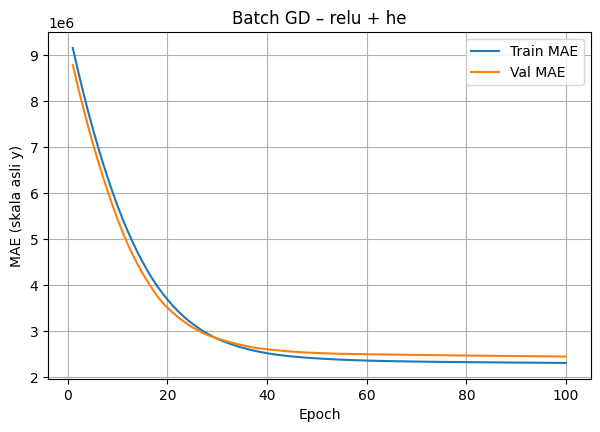

Iter   10 | Train MAE = 4024408.9227 | Val MAE = 3924394.0369
Iter   20 | Train MAE = 3826080.9818 | Val MAE = 3863416.0896
Iter   30 | Train MAE = 3695006.7142 | Val MAE = 3807060.2841
Iter   40 | Train MAE = 3602779.6000 | Val MAE = 3754437.1606
Iter   50 | Train MAE = 3534070.6513 | Val MAE = 3704857.9808
Iter   60 | Train MAE = 3479836.5643 | Val MAE = 3657839.5139
Iter   70 | Train MAE = 3436376.7169 | Val MAE = 3619582.5182
Iter   80 | Train MAE = 3399128.6809 | Val MAE = 3589252.4735
Iter   90 | Train MAE = 3363951.2568 | Val MAE = 3557120.6122
Iter  100 | Train MAE = 3330511.4385 | Val MAE = 3523753.4385

Saved results to results3.csv


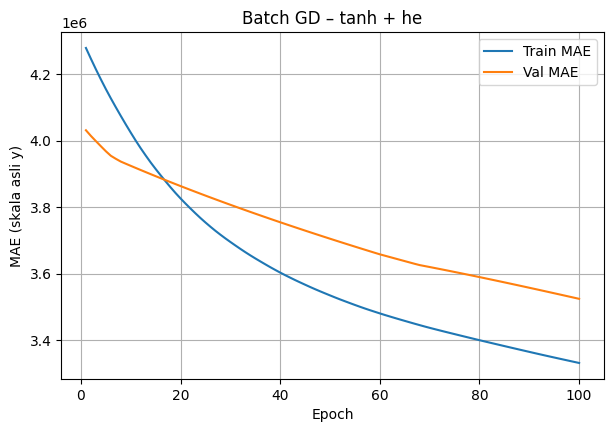

Iter   10 | Train MAE = 5720283.7254 | Val MAE = 5432849.8951
Iter   20 | Train MAE = 3688596.4149 | Val MAE = 3512304.5193
Iter   30 | Train MAE = 2834745.6747 | Val MAE = 2842851.5509
Iter   40 | Train MAE = 2520213.3928 | Val MAE = 2606443.7462
Iter   50 | Train MAE = 2407994.7337 | Val MAE = 2525617.8587
Iter   60 | Train MAE = 2360592.7304 | Val MAE = 2498485.8573
Iter   70 | Train MAE = 2338671.9612 | Val MAE = 2483049.3631
Iter   80 | Train MAE = 2326320.5858 | Val MAE = 2470162.8152
Iter   90 | Train MAE = 2317091.8672 | Val MAE = 2458838.0988
Iter  100 | Train MAE = 2308078.2373 | Val MAE = 2448487.0207

Saved results to results3.csv


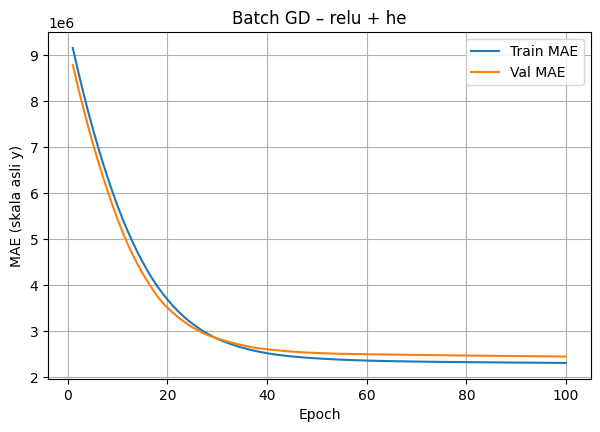

In [30]:
#BATCH GRADIENT DESCENT
#relu
W1, b1, W2, b2, hist_batch = batch_gradient_descent(
    X_train_array, Y_train_array,
    epochs=100, lr=0.001, hidden_neuron=32,
    activation='relu', winit='he',
    log_every=1
)
plot_learning_curve(hist_batch, title="Batch GD – relu + he")

#tanh
W1, b1, W2, b2, hist_batch = batch_gradient_descent(
    X_train_array, Y_train_array,
    epochs=100, lr=0.001, hidden_neuron=32,
    activation='tanh', winit='he',
    log_every=1
)
plot_learning_curve(hist_batch, title="Batch GD – tanh + he")

#leaky relu
W1, b1, W2, b2, hist_batch = batch_gradient_descent(
    X_train_array, Y_train_array,
    epochs=100, lr=0.001, hidden_neuron=32,
    activation='relu', winit='he',
    log_every=1
)
plot_learning_curve(hist_batch, title="Batch GD – relu + he")

Epoch   10 | Train MAE = 1313555.8520 | Val MAE = 1237698.2427
Epoch   20 | Train MAE = 1100657.4648 | Val MAE = 1006250.2590
Epoch   30 | Train MAE = 1010995.6026 | Val MAE = 942654.8513
Epoch   40 | Train MAE = 937201.7431 | Val MAE = 875936.7089
Epoch   50 | Train MAE = 947565.6043 | Val MAE = 914356.4044
Epoch   60 | Train MAE = 885653.0171 | Val MAE = 866436.4152
Epoch   70 | Train MAE = 845962.7006 | Val MAE = 831668.9828
Epoch   80 | Train MAE = 828949.1906 | Val MAE = 823191.5601
Epoch   90 | Train MAE = 814614.3038 | Val MAE = 816345.2641
Epoch  100 | Train MAE = 800370.8318 | Val MAE = 804579.3286

Saved results to results3.csv


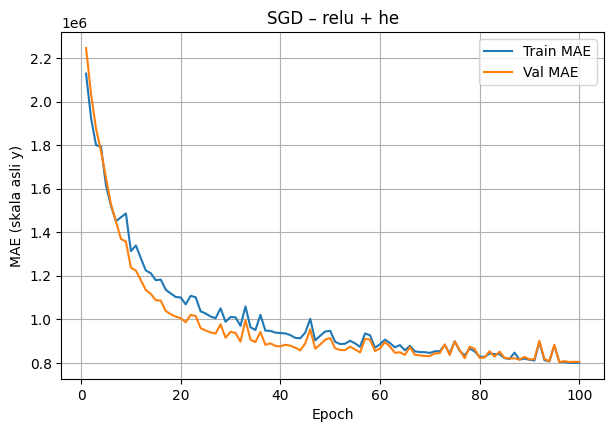

Epoch   10 | Train MAE = 1434936.3127 | Val MAE = 1385006.2249
Epoch   20 | Train MAE = 1221192.5145 | Val MAE = 1171711.4898
Epoch   30 | Train MAE = 1149880.2525 | Val MAE = 1102893.6797
Epoch   40 | Train MAE = 1082791.1549 | Val MAE = 1039272.2353
Epoch   50 | Train MAE = 1068354.8769 | Val MAE = 1011688.5549
Epoch   60 | Train MAE = 1009454.0191 | Val MAE = 946229.1313
Epoch   70 | Train MAE = 980698.0949 | Val MAE = 912725.6380
Epoch   80 | Train MAE = 960368.9037 | Val MAE = 894021.5335
Epoch   90 | Train MAE = 940721.6997 | Val MAE = 869748.7366
Epoch  100 | Train MAE = 924365.2691 | Val MAE = 861212.5766

Saved results to results3.csv


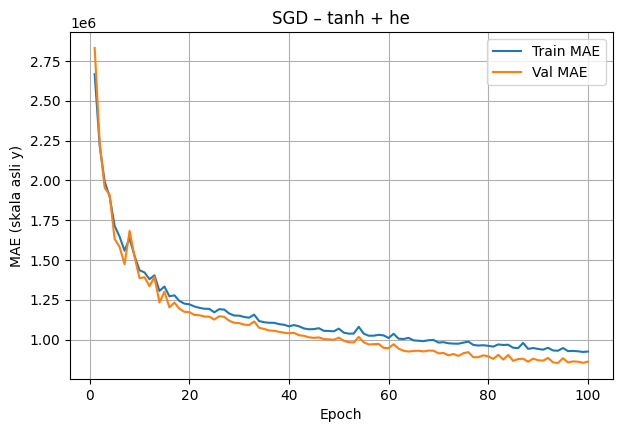

Epoch   10 | Train MAE = 1266078.2404 | Val MAE = 1212577.1318
Epoch   20 | Train MAE = 1082578.9230 | Val MAE = 1017652.0949
Epoch   30 | Train MAE = 1008921.0890 | Val MAE = 946149.0488
Epoch   40 | Train MAE = 936223.7305 | Val MAE = 880357.5444
Epoch   50 | Train MAE = 949305.0128 | Val MAE = 908014.5578
Epoch   60 | Train MAE = 885849.2544 | Val MAE = 865701.9516
Epoch   70 | Train MAE = 848844.4466 | Val MAE = 826618.9290
Epoch   80 | Train MAE = 831279.7590 | Val MAE = 817463.8260
Epoch   90 | Train MAE = 819500.0376 | Val MAE = 808014.3882
Epoch  100 | Train MAE = 809135.8958 | Val MAE = 801096.9587

Saved results to results3.csv


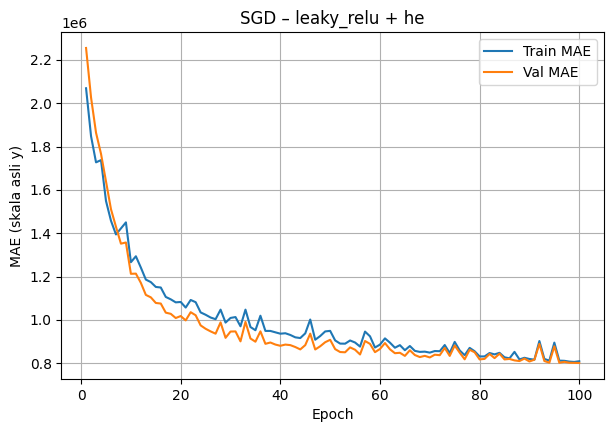

In [31]:
#STOCHASTIC GRADIENT DESCENT
#relu
W1, b1, W2, b2, hist_sgd = stoch_gradient_descent(
    X_train_array, Y_train_array,
    epochs=100, lr=0.001, hidden_neuron=32,
    activation='relu', winit='he',
    shuffle=True, seed=42, log_every=1
)
plot_learning_curve(hist_sgd, title="SGD – relu + he")

#tanh
W1, b1, W2, b2, hist_sgd = stoch_gradient_descent(
    X_train_array, Y_train_array,
    epochs=100, lr=0.001, hidden_neuron=32,
    activation='tanh', winit='he',
    shuffle=True, seed=42, log_every=1
)
plot_learning_curve(hist_sgd, title="SGD – tanh + he")

#leaky relu
W1, b1, W2, b2, hist_sgd = stoch_gradient_descent(
    X_train_array, Y_train_array,
    epochs=100, lr=0.001, hidden_neuron=32,
    activation='leaky_relu', winit='he',
    shuffle=True, seed=42, log_every=1
)
plot_learning_curve(hist_sgd, title="SGD – leaky_relu + he")

Epoch   10 | Train MAE = 2325617.2035 | Val MAE = 2470606.0327
Epoch   20 | Train MAE = 2254857.5965 | Val MAE = 2394917.6067
Epoch   30 | Train MAE = 2195543.2787 | Val MAE = 2330021.8015
Epoch   40 | Train MAE = 2142155.7245 | Val MAE = 2277910.3723
Epoch   50 | Train MAE = 2098192.5798 | Val MAE = 2229877.2355
Epoch   60 | Train MAE = 2055124.9486 | Val MAE = 2184686.6980
Epoch   70 | Train MAE = 2018917.9812 | Val MAE = 2141979.8418
Epoch   80 | Train MAE = 1984886.1742 | Val MAE = 2101943.7904
Epoch   90 | Train MAE = 1951605.8026 | Val MAE = 2063454.7038
Epoch  100 | Train MAE = 1921969.1478 | Val MAE = 2026495.9903


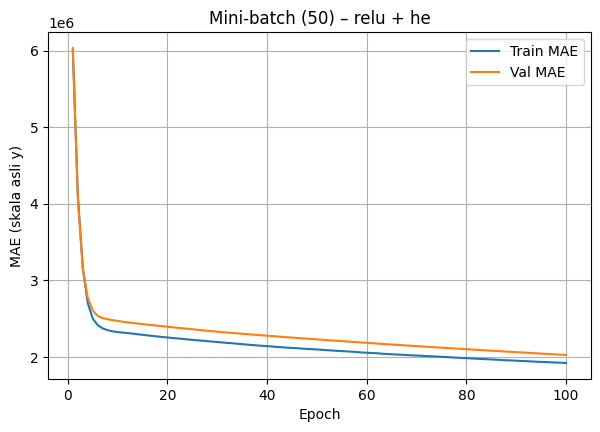

Epoch   10 | Train MAE = 3395354.6737 | Val MAE = 3589458.1999
Epoch   20 | Train MAE = 3145899.7170 | Val MAE = 3338679.6280
Epoch   30 | Train MAE = 2942111.8776 | Val MAE = 3114400.2131
Epoch   40 | Train MAE = 2771234.2154 | Val MAE = 2918564.6341
Epoch   50 | Train MAE = 2629191.6917 | Val MAE = 2747355.7395
Epoch   60 | Train MAE = 2510477.1922 | Val MAE = 2594049.2370
Epoch   70 | Train MAE = 2411668.1757 | Val MAE = 2466861.1640
Epoch   80 | Train MAE = 2330293.5956 | Val MAE = 2370436.7771
Epoch   90 | Train MAE = 2259094.6630 | Val MAE = 2281365.1131
Epoch  100 | Train MAE = 2198623.0139 | Val MAE = 2201966.6200


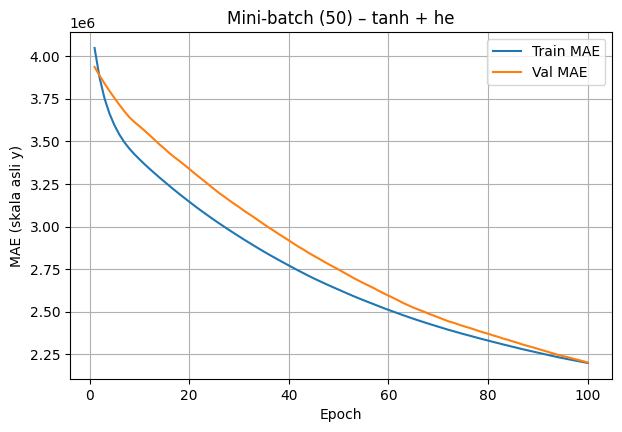

Epoch   10 | Train MAE = 2318822.2314 | Val MAE = 2529197.0691
Epoch   20 | Train MAE = 2219075.2909 | Val MAE = 2441430.8320
Epoch   30 | Train MAE = 2143168.7018 | Val MAE = 2366376.2809
Epoch   40 | Train MAE = 2081844.0994 | Val MAE = 2301464.3474
Epoch   50 | Train MAE = 2032320.0878 | Val MAE = 2241887.2996
Epoch   60 | Train MAE = 1985372.6600 | Val MAE = 2189823.1003
Epoch   70 | Train MAE = 1946426.1792 | Val MAE = 2143544.0198
Epoch   80 | Train MAE = 1911006.5101 | Val MAE = 2100729.3186
Epoch   90 | Train MAE = 1877097.8556 | Val MAE = 2060219.3322
Epoch  100 | Train MAE = 1846773.8881 | Val MAE = 2021623.8576


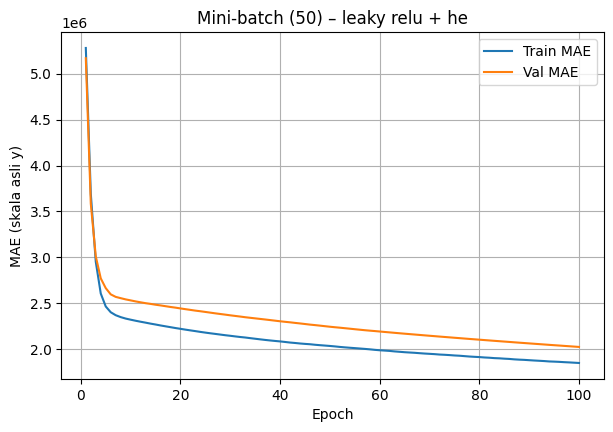

In [35]:
#BATCH GRADIENT DESCENT
#relu
W1, b1, W2, b2, hist_minib = mini_batch_gradient_descent(
    X_train_array, Y_train_array,
    epochs=100, lr=0.001, hidden_neuron=32,
    activation='relu', winit='he',
    batch_size=50, shuffle=True, seed=42, log_every=1
)
plot_learning_curve(hist_minib, title="Mini-batch (50) – relu + he")
#tanh
W1, b1, W2, b2, hist_minib = mini_batch_gradient_descent(
    X_train_array, Y_train_array,
    epochs=100, lr=0.001, hidden_neuron=32,
    activation='tanh', winit='he',
    batch_size=50, shuffle=True, seed=42, log_every=1
)
plot_learning_curve(hist_minib, title="Mini-batch (50) – tanh + he")
#leaky relu
W1, b1, W2, b2, hist_minib = mini_batch_gradient_descent(
    X_train_array, Y_train_array,
    epochs=100, lr=0.001, hidden_neuron=32,
    activation='leaky_relu', winit='he',
    batch_size=50, shuffle=True, seed=42, log_every=1
)
plot_learning_curve(hist_minib, title="Mini-batch (50) – leaky relu + he")